In this project you will implement two encryption/decryption systems, one using AES in CBC mode and another using AES in counter mode (CTR).  In both cases the 16-byte encryption IV is chosen at random and is prepended to the ciphertext.

For CBC encryption we use the PKCS5 padding scheme discussed  in the lecture (14:04). While we ask that you implement both encryption and decryption, we will only test the decryption function.   In the following questions you are given an AES key and a ciphertext (both are  hex encoded ) and your goal is to recover the plaintext and enter it in the input boxes provided below.

For an implementation of AES you may use an existing crypto library such as PyCrypto  (Python), Crypto++  (C++), or any other. While it is fine to use the built-in AES functions, we ask that as a learning experience you implement CBC and CTR modes yourself.

In [6]:
##pip install pycryptodome

Note: you may need to restart the kernel to use updated packages.


In [8]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad
import binascii

## CBC encryption model

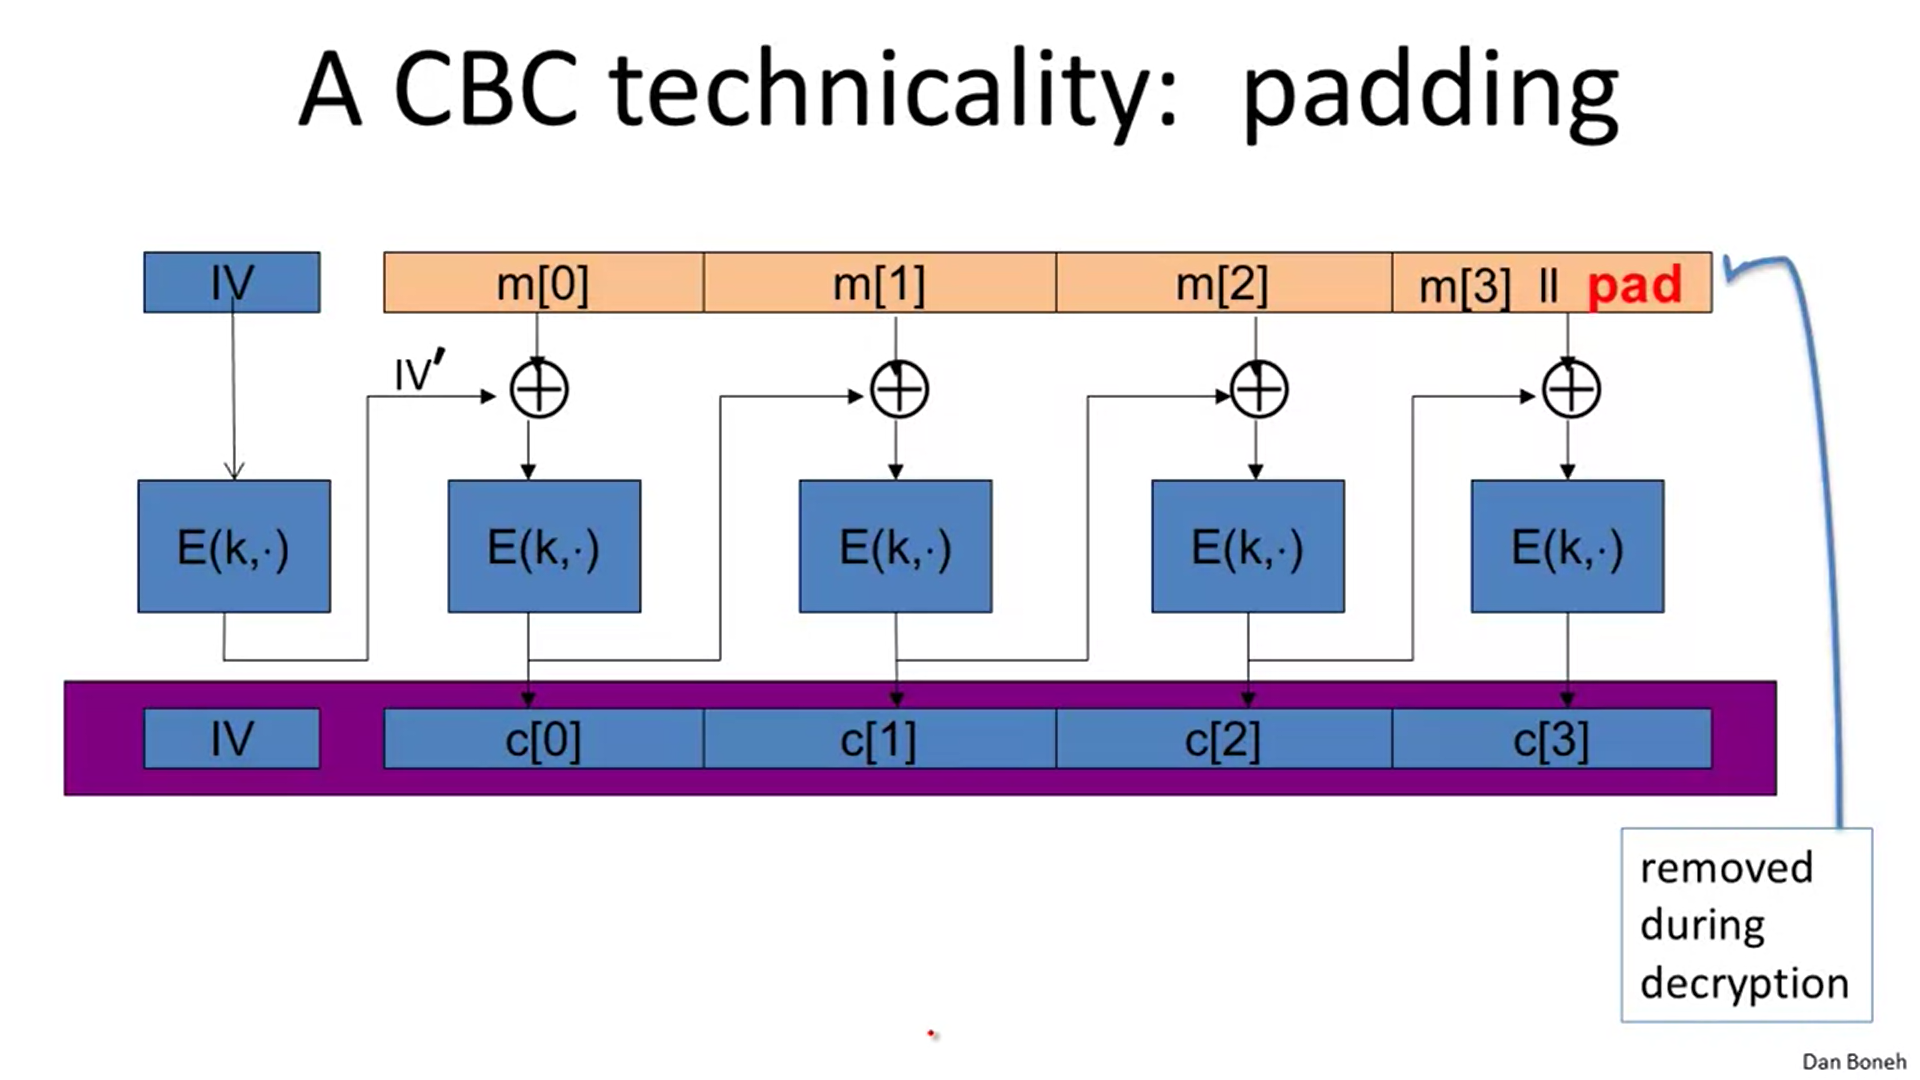

## Q1

CBC key: 140b41b22a29beb4061bda66b6747e14

CBC Ciphertext 1: 4ca00ff4c898d61e1edbf1800618fb2828a226d160dad07883d04e008a7897ee2e4b7465d5290d0c0e6c6822236e1daafb94ffe0c5da05d9476be028ad7c1d81

In [40]:
k1 = "140b41b22a29beb4061bda66b6747e14"
c1 = "4ca00ff4c898d61e1edbf1800618fb2828a226d160dad07883d04e008a7897ee2e4b7465d5290d0c0e6c6822236e1daafb94ffe0c5da05d9476be028ad7c1d81"

In [41]:
## covert key's type from string to byte
k1 = bytes.fromhex(k1)

## construct a new AES in CBC mode cipher object
cipher1 = AES.new(k1, AES.MODE_CBC)

In [42]:
## convert cipher text's type from string to byte 
c1 = bytes.fromhex(c1)

## decrypt the cipher text (also unpad the padding)
pt1 = unpad(cipher1.decrypt(c1), AES.block_size)

In [43]:
## check the length of original cipher text and after decryption
## after decryption shouid be less than original (unpad)
## in this example we can see the pad of it is 8 (64-56)
print(len(c1))
print(len(pt1))

64
56


In [44]:
## convert the decryption text from byte to hex
pt1 = pt1.hex()
print(pt1)
print(len(pt1))

454914da23f2e51fdf7e8592415744f0426173696320434243206d6f646520656e6372797074696f6e206e656564732070616464696e672e
112


In [45]:
## the first 16 bytes is the IV, which is the first 32 character
## remove the IV to get plain hex text
pt1 = pt1[32:]

## convert the hex text to real plain text with ASCII
pt1 = binascii.a2b_hex(pt1)
print(pt1.decode("ASCII"))

Basic CBC mode encryption needs padding.


## Q2
CBC key: 140b41b22a29beb4061bda66b6747e14

CBC Ciphertext 2: 5b68629feb8606f9a6667670b75b38a5b4832d0f26e1ab7da33249de7d4afc48e713ac646ace36e872ad5fb8a512428a6e21364b0c374df45503473c5242a253

In [46]:
k2 = "140b41b22a29beb4061bda66b6747e14"
c2 = "5b68629feb8606f9a6667670b75b38a5b4832d0f26e1ab7da33249de7d4afc48e713ac646ace36e872ad5fb8a512428a6e21364b0c374df45503473c5242a253"

In [47]:
k2 = bytes.fromhex(k2)
cipher2 = AES.new(k2, AES.MODE_CBC)

c2 = bytes.fromhex(c2)
pt2 = unpad(cipher2.decrypt(c2), AES.block_size)

print(len(c2))
print(len(pt2))

pt2 = pt2.hex()
print(pt2)
print(len(pt2))

pt2 = pt2[32:]
pt2 = binascii.a2b_hex(pt2)
print(pt2.decode("ASCII"))

64
48
a4c3922dbd0e85b398da5ca2f3fb7aba4f757220696d706c656d656e746174696f6e20757365732072616e642e204956
96
Our implementation uses rand. IV


## CTR encryption model

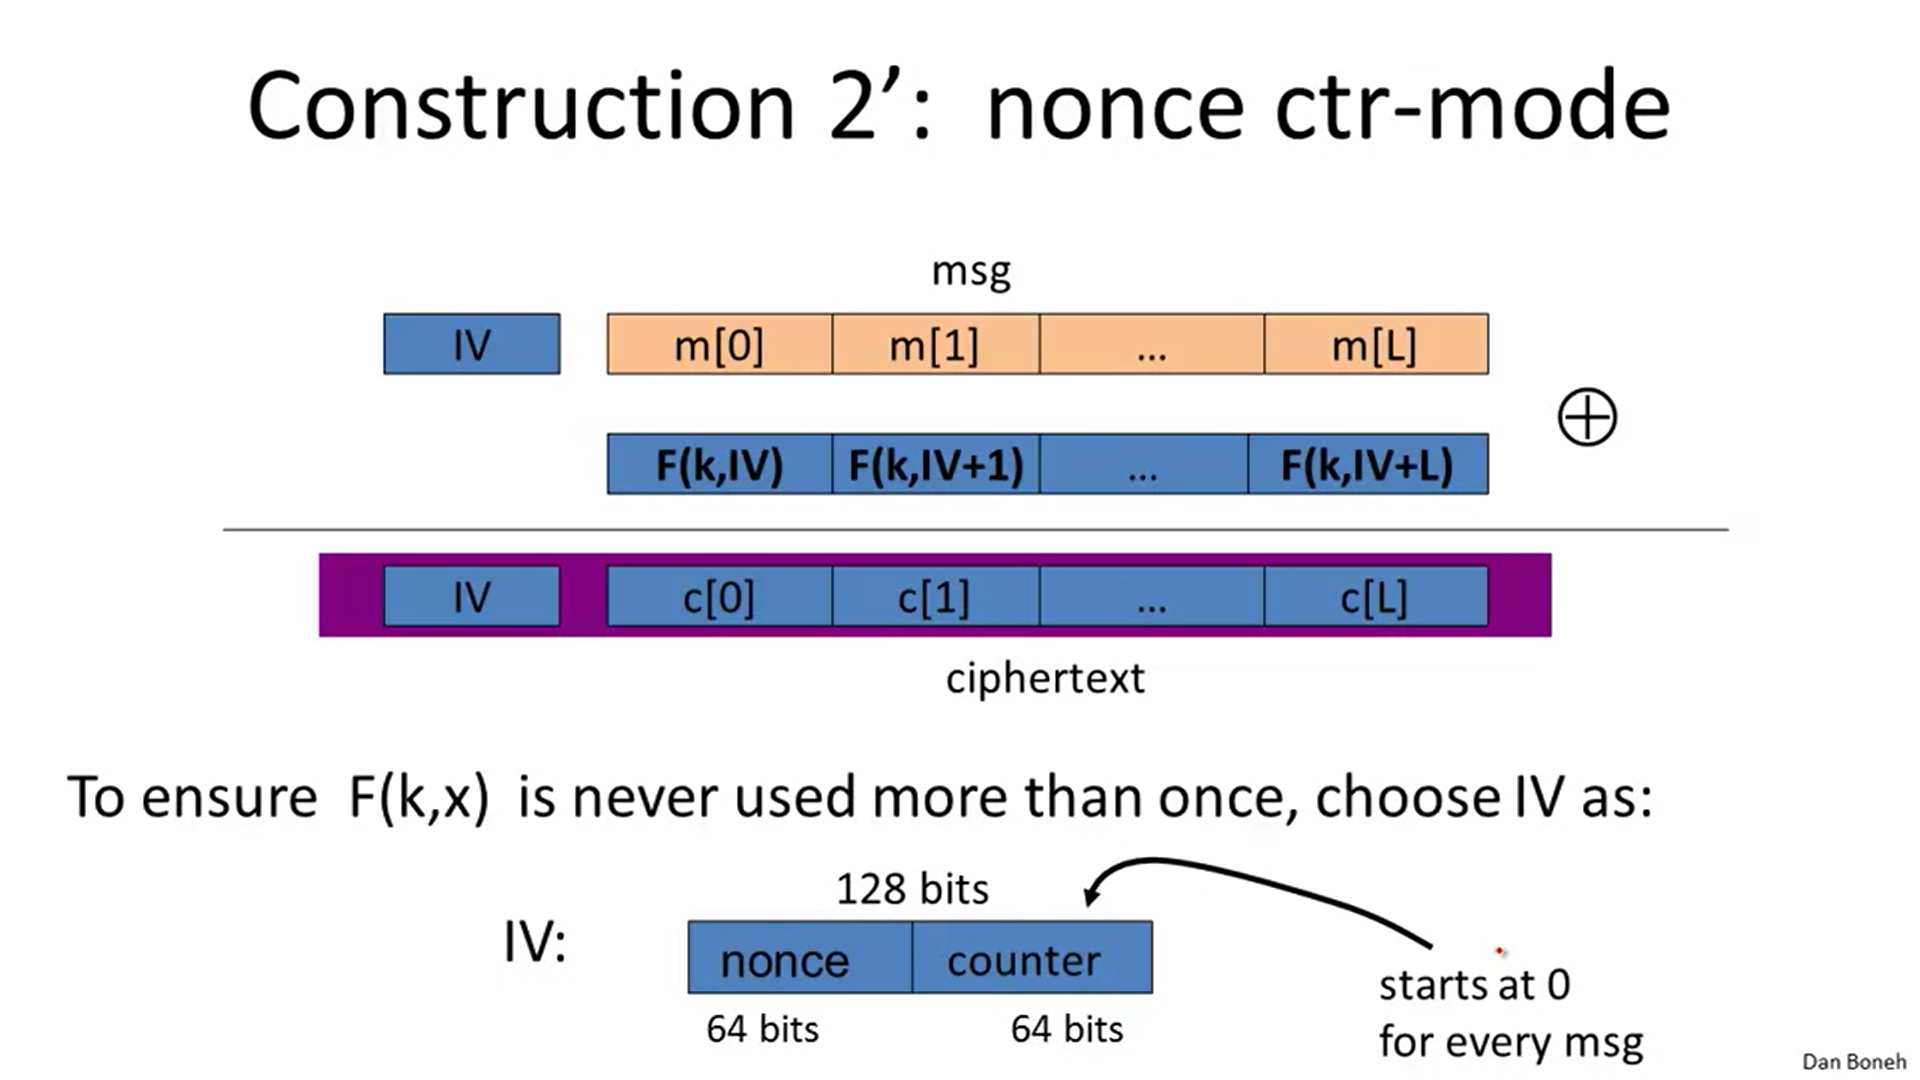

## Q3
CTR key: 36f18357be4dbd77f050515c73fcf9f2

CTR Ciphertext 1: 69dda8455c7dd4254bf353b773304eec0ec7702330098ce7f7520d1cbbb20fc388d1b0adb5054dbd7370849dbf0b88d393f252e764f1f5f7ad97ef79d59ce29f5f51eeca32eabedd9afa9329

In [106]:
k3 = "36f18357be4dbd77f050515c73fcf9f2"
c3 = "69dda8455c7dd4254bf353b773304eec0ec7702330098ce7f7520d1cbbb20fc388d1b0adb5054dbd7370849dbf0b88d393f252e764f1f5f7ad97ef79d59ce29f5f51eeca32eabedd9afa9329"

In [107]:
## convert hex to byte
k3 = bytes.fromhex(k3)

## CTR mode IV = nonce (16 bytes) + counter (16 bytes)
## hence the first 16 bytes is nonce, and 16 to 32 bytes is counter
nonce = c3[:16]
nonce = bytes.fromhex(nonce)

counter = c3[16:32]
counter = bytes.fromhex(counter)

## decrypt input cipher text doesn't include the IV
c3 = c3[32:]
c3 = bytes.fromhex(c3)

## CTR mode's counter will +1 in every block
## the CTR model's variable initial_value should be the first counter
cipher3 = AES.new(k3, AES.MODE_CTR, nonce = nonce, initial_value = counter)

In [108]:
pt3 = cipher3.decrypt(c3)     ## no pad and block size need for CTR mode

## the length of ciphertext and plaintext should be same
print(len(c3))
print(len(pt3))

## covert byte to hex
pt3 = pt3.hex()
print(pt3)

## convert hex to string decode by ASCII
pt3 = binascii.a2b_hex(pt3)
print(pt3.decode("ASCII"))

60
60
435452206d6f6465206c65747320796f75206275696c6420612073747265616d206369706865722066726f6d206120626c6f636b206369706865722e
CTR mode lets you build a stream cipher from a block cipher.


## Q4
CTR key: 36f18357be4dbd77f050515c73fcf9f2

CTR Ciphertext 2: 770b80259ec33beb2561358a9f2dc617e46218c0a53cbeca695ae45faa8952aa0e311bde9d4e01726d3184c34451

In [112]:
k4 = "36f18357be4dbd77f050515c73fcf9f2"
c4 = "770b80259ec33beb2561358a9f2dc617e46218c0a53cbeca695ae45faa8952aa0e311bde9d4e01726d3184c34451"

In [113]:
k4 = bytes.fromhex(k4)

nonce = c4[:16]
nonce = bytes.fromhex(nonce)

counter = c4[16:32]
counter = bytes.fromhex(counter)

c4 = c4[32:]
c4 = bytes.fromhex(c4)

cipher4 = AES.new(k4, AES.MODE_CTR, nonce = nonce, initial_value = counter)

pt4 = cipher4.decrypt(c4)
print(len(c4))
print(len(pt4))

pt4 = pt4.hex()
print(pt4)

pt4 = binascii.a2b_hex(pt4)
print(pt4.decode("ASCII"))

30
30
416c776179732061766f6964207468652074776f2074696d652070616421
Always avoid the two time pad!


## Additional

### comparison of CBC and CTR

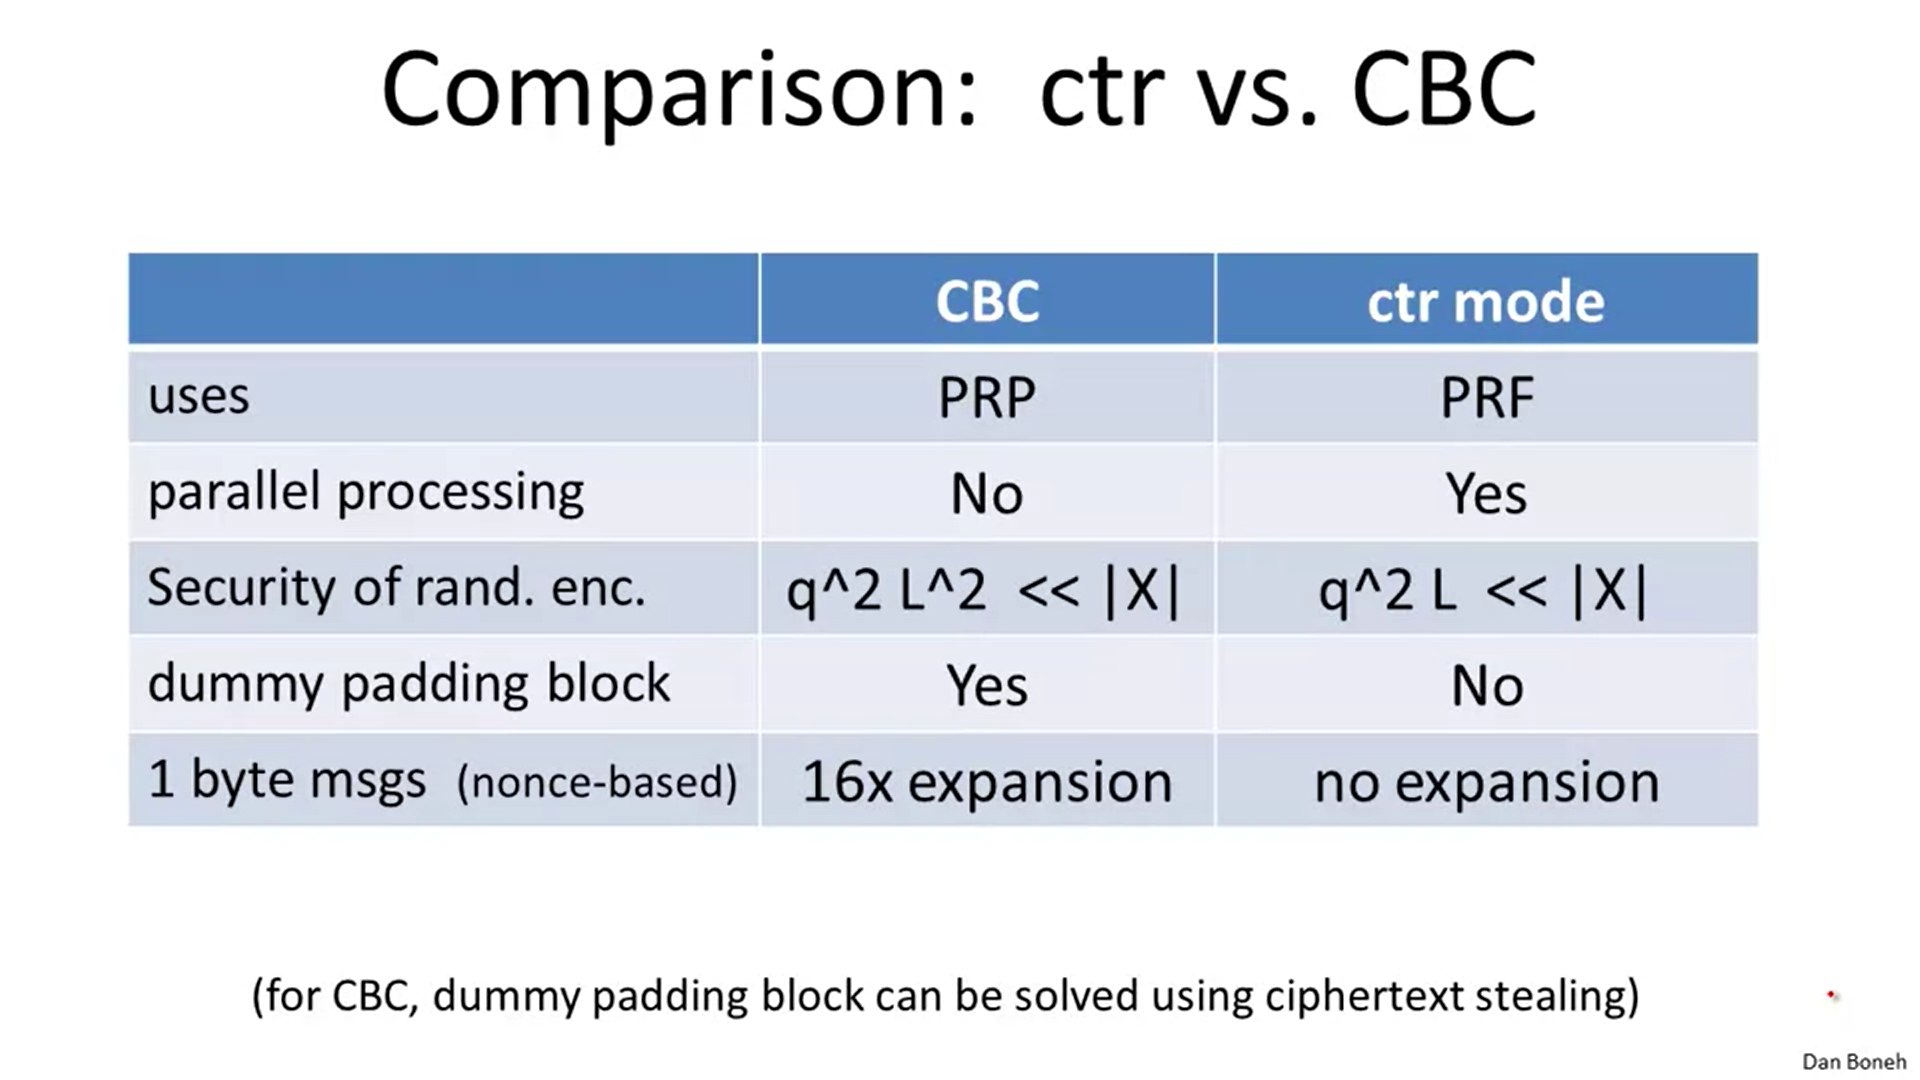

In [16]:
## how the random IV is generate and save
from Crypto.Random import get_random_bytes
key = get_random_bytes(16)
print(key)

b'\xed9\xb6\xc6\x08\x02\xa3\xea)\xda\xc4\xfc!-\xe3\xef'


In [15]:
## way to convert hex to byte
a = bytes.fromhex(k1)
print(type(a))
print(a)

<class 'bytes'>
b'\x14\x0bA\xb2*)\xbe\xb4\x06\x1b\xdaf\xb6t~\x14'
